<a href="https://colab.research.google.com/github/alauzon13/alauzon13.github.io/blob/main/MIE1624_Project_PCA_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.ensemble import RandomForestRegressor
from mpl_toolkits.mplot3d import Axes3D  # Import for 3D plotting


In [ ]:
from google.colab import files
files.upload()

In [ ]:
#df_orig = pd.read_csv("./FINAL_country_feature_data (2).csv", low_memory = False, encoding = 'latin2')
df_orig = pd.read_csv("FINAL_country_feature_data.csv", low_memory = False, encoding = 'latin2')
df = df_orig.drop(columns=['Innovation Score'])
df.head()

,Country,R&D Expenditure (% of GDP),Number of Researchers per Capita,Education Quality (STEM graduates),Number of Patents Filed per Capita,Number of Unicorn Startups,High-tech Exports (% of total exports),Government Spending on Innovation,Venture Capital Investments,Public-Private Collaboration Index Encoded,Infrastructure Readiness Encoded,Knowledge Diffusion Encoded,Tax Incentives for R&D Encoded
0,Australia,1.85,5.70,113.03,2.69,6.39,17.58,1.19,1844.44,2.0,3.0,2.0,2.0
1,Canada,1.70,5.94,119.44,3.04,9.67,20.55,1.22,3465.91,2.0,3.0,2.0,2.0
2,China,2.32,5.92,146.37,8.81,86.26,28.26,1.51,23800.00,2.0,3.0,2.0,2.0
3,Estonia,1.62,4.40,80.29,1.44,2.50,18.00,0.77,581.11,2.0,3.0,2.0,2.0
4,Finland,2.89,7.43,160.52,4.69,6.56,24.60,1.35,1552.78,3.0,3.0,3.0,3.0


In [ ]:
df

,Country,R&D Expenditure (% of GDP),Number of Researchers per Capita,Education Quality (STEM graduates),Number of Patents Filed per Capita,Number of Unicorn Startups,High-tech Exports (% of total exports),Government Spending on Innovation,Venture Capital Investments,Public-Private Collaboration Index Encoded,Infrastructure Readiness Encoded,Knowledge Diffusion Encoded,Tax Incentives for R&D Encoded
0,Australia,1.85,5.70,113.03,2.69,6.39,17.58,1.19,1844.44,2.0,3.0,2.0,2.0
1,Canada,1.70,5.94,119.44,3.04,9.67,20.55,1.22,3465.91,2.0,3.0,2.0,2.0
2,China,2.32,5.92,146.37,8.81,86.26,28.26,1.51,23800.00,2.0,3.0,2.0,2.0
3,Estonia,1.62,4.40,80.29,1.44,2.50,18.00,0.77,581.11,2.0,3.0,2.0,2.0
4,Finland,2.89,7.43,160.52,4.69,6.56,24.60,1.35,1552.78,3.0,3.0,3.0,3.0
5,Germany,2.93,6.35,141.91,6.90,13.25,25.57,1.56,4476.32,3.0,3.0,3.0,2.0
6,India,0.70,1.26,58.09,0.59,32.58,9.91,0.62,5628.95,1.0,1.0,1.0,1.0
7,New Zealand,1.41,5.42,74.80,1.85,3.00,15.38,0.72,560.56,2.0,2.0,2.0,2.0
8,Norway,1.85,5.85,100.31,2.82,2.44,17.01,1.02,878.89,2.0,3.0,2.0,2.0
9,Singapore,2.47,13.69,189.74,9.81,16.18,34.11,1.64,6482.35,3.0,3.0,3.0,3.0


#PCA

In [ ]:
df_no_country = df.drop(columns=['Country'])
Public_Private_Collaboration_Index_Encoded_encoding = pd.get_dummies(df['Public-Private Collaboration Index Encoded'],sparse=False, dtype = int)
df_no_country.drop(columns=['Public-Private Collaboration Index Encoded'], inplace=True)
Infrastructure_Readiness_Encoded_encoding = pd.get_dummies(df['Infrastructure Readiness Encoded'],sparse=False, dtype = int)
df_no_country.drop(columns=['Infrastructure Readiness Encoded'], inplace=True)
Knowledge_Diffusion_Encoded_encoding = pd.get_dummies(df['Knowledge Diffusion Encoded'],sparse=False, dtype = int)
df_no_country.drop(columns=['Knowledge Diffusion Encoded'], inplace=True)
Tax_Incentives_for_R_and_D_Encoded_encoding = pd.get_dummies(df['Tax Incentives for R&D Encoded'],sparse=False, dtype = int)
df_no_country.drop(columns=['Tax Incentives for R&D Encoded'], inplace=True)

pca = PCA(n_components=2)
scaler = StandardScaler()
data_no_country_normalized = scaler.fit_transform(df_no_country)
df_no_country_normalized = pd.DataFrame(data_no_country_normalized)
df_no_country_normalized = pd.concat([df_no_country_normalized, Public_Private_Collaboration_Index_Encoded_encoding],axis=1)
df_no_country_normalized = pd.concat([df_no_country_normalized, Infrastructure_Readiness_Encoded_encoding],axis=1)
df_no_country_normalized = pd.concat([df_no_country_normalized, Knowledge_Diffusion_Encoded_encoding],axis=1)
df_no_country_normalized = pd.concat([df_no_country_normalized, Tax_Incentives_for_R_and_D_Encoded_encoding],axis=1)
data_no_country_normalized_reduced = pca.fit_transform(data_no_country_normalized)

In [ ]:
Infrastructure_Readiness_Encoded_encoding = pd.get_dummies(df['Infrastructure Readiness Encoded'],sparse=True)
Infrastructure_Readiness_Encoded_encoding.head()

,1.0,2.0,3.0
0,False,False,True
1,False,False,True
2,False,False,True
3,False,False,True
4,False,False,True


In [ ]:
pca = PCA(n_components=2)
scaler = StandardScaler()
data_no_country_normalized = scaler.fit_transform(df_no_country)
data_no_country_normalized_reduced = pca.fit_transform(data_no_country_normalized)

In [ ]:
data_no_country_normalized_reduced

array([[-1.27560655, -0.1618654 ],
       [-0.96759032, -0.19054533],
       [ 1.59029936,  0.74494246],
       [-2.04490697, -0.02076266],
       [ 0.47707189, -1.00084865],
       [ 0.64609693, -0.7929173 ],
       [-3.34749621,  1.49649839],
       [-2.13706103, -0.01994745],
       [-1.43589266, -0.26146233],
       [ 2.85690694, -1.9955577 ],
       [ 1.95462383, -1.58342269],
       [ 0.83640971, -1.14612938],
       [ 2.12419424, -1.50715508],
       [ 0.10649756,  1.30803321],
       [ 4.16300513,  4.53697251],
       [-3.54655186,  0.59416738]])

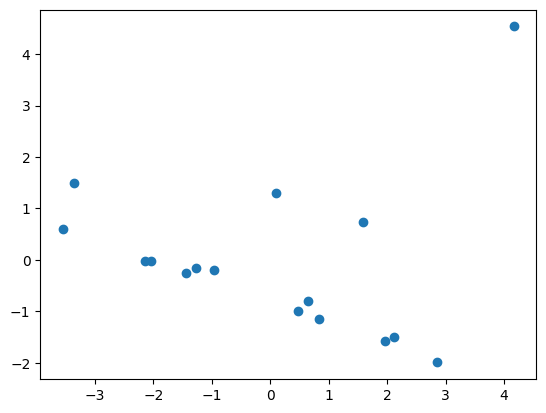

In [ ]:
df_no_country_normalized_reduced = pd.DataFrame(data_no_country_normalized_reduced)
df_normalized_reduced = pd.concat([df['Country'],df_no_country_normalized_reduced],axis=1)
plt.scatter(df_normalized_reduced[0],df_normalized_reduced[1], label = df_normalized_reduced['Country'])
plt.show()

<ipython-input-10-1bf4aad65204>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set1', len(countries))  # Choose a colormap


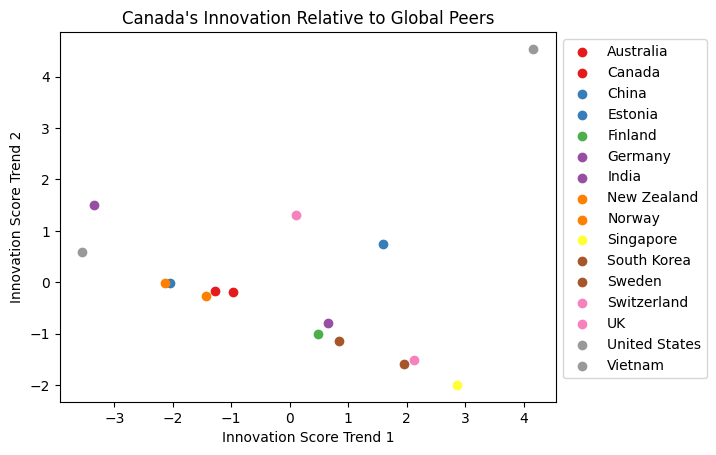

In [ ]:
#PCA with countries colored in the legend
countries = df_normalized_reduced['Country'].unique()
colors = plt.cm.get_cmap('Set1', len(countries))  # Choose a colormap

for i, country in enumerate(countries):
    country_data = df_normalized_reduced[df_normalized_reduced['Country'] == country]
    plt.scatter(country_data[0], country_data[1], color=colors(i), label=country)

plt.xlabel('Innovation Score Trend 1')
plt.ylabel('Innovation Score Trend 2')
plt.title('Canada\'s Innovation Relative to Global Peers')
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.show()

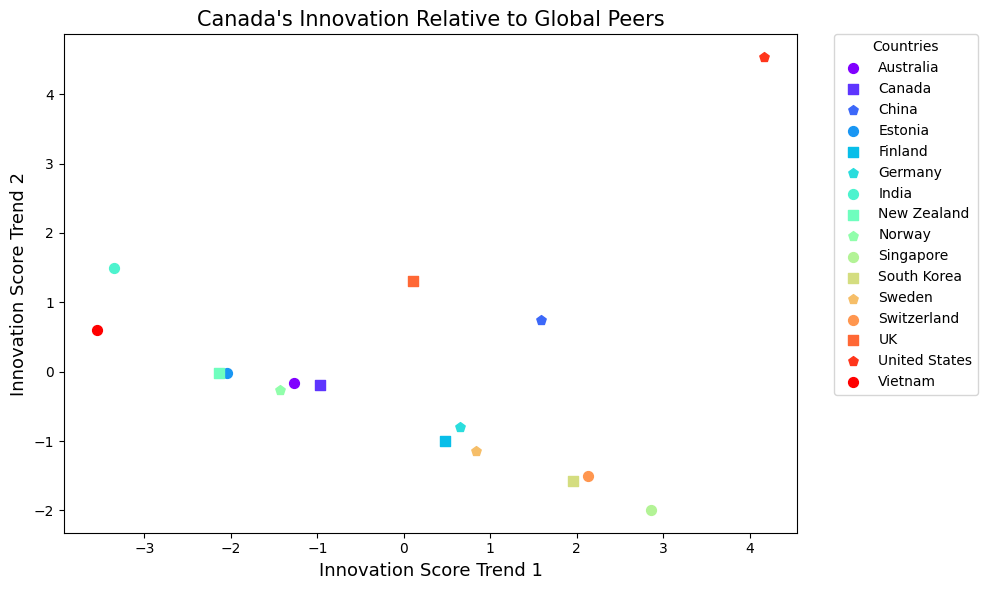

In [ ]:
# Assuming 'df_normalized_reduced' is your PCA dataframe with numerical components as columns 0 and 1
countries = df_normalized_reduced['Country'].unique()
shapes = ['o', 's', 'p']  # Circle, square, pentagon
colors = plt.cm.rainbow(np.linspace(0, 1, len(countries)))  # Vibrant color gradient

plt.figure(figsize=(10, 6))

# Plot each country with its assigned color and shape
for i, country in enumerate(countries):
    country_data = df_normalized_reduced[df_normalized_reduced['Country'] == country]
    plt.scatter(
        country_data[0],  # Innovation Score Trend 1
        country_data[1],  # Innovation Score Trend 2
        color=colors[i],  # Assign vibrant color
        marker=shapes[i % len(shapes)],  # Rotate through shapes
        label=country,
        s=50  # Adjust marker size
    )

# Set axis labels and title
plt.xlabel('Innovation Score Trend 1', fontsize=13)
plt.ylabel('Innovation Score Trend 2', fontsize=13)
plt.title("Canada's Innovation Relative to Global Peers", fontsize=15)

# Add legend
plt.legend(title="Countries", loc='best', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

from matplotlib import rcParams
rcParams['figure.dpi'] = 1000

# Finalize layout and show plot
plt.tight_layout()
plt.show()

In [ ]:
# 3 dimensional PCA
pca = PCA(n_components=3)
data_no_country_normalized_reduced_3 = pca.fit_transform(data_no_country_normalized)

# Create a DataFrame for plotting
data_no_country_normalized_reduced_3 = pd.DataFrame(data_no_country_normalized_reduced_3)
df_normalized_reduced_3 = pd.concat([df['Country'], data_no_country_normalized_reduced_3], axis=1)

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Assuming 'Country' is a column in your DataFrame
countries = df_normalized_reduced_3['Country'].unique()
colors = plt.cm.get_cmap('Set1', len(countries))  # Choose a colormap

for i, country in enumerate(countries):
    country_data = df_normalized_reduced_3[df_normalized_reduced_3['Country'] == country]
    ax.scatter(country_data[0], country_data[1], country_data[2], color=colors(i), label=country)

ax.set_xlabel('Innovation Score Trend 1')
ax.set_ylabel('Innovation Score Trend 2')
ax.set_zlabel('Innovation Score Trend 3')
ax.set_title('Canada\'s Innovation Relative to Global Peers - 3D')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()


In [ ]:
df_normalized_reduced

,Country,0,1
0,Australia,-1.275607,-0.161865
1,Canada,-0.967590,-0.190545
2,China,1.590299,0.744942
3,Estonia,-2.044907,-0.020763
4,Finland,0.477072,-1.000849
5,Germany,0.646097,-0.792917
6,India,-3.347496,1.496498
7,New Zealand,-2.137061,-0.019947
8,Norway,-1.435893,-0.261462
9,Singapore,2.856907,-1.995558


#Clustering

##K-means

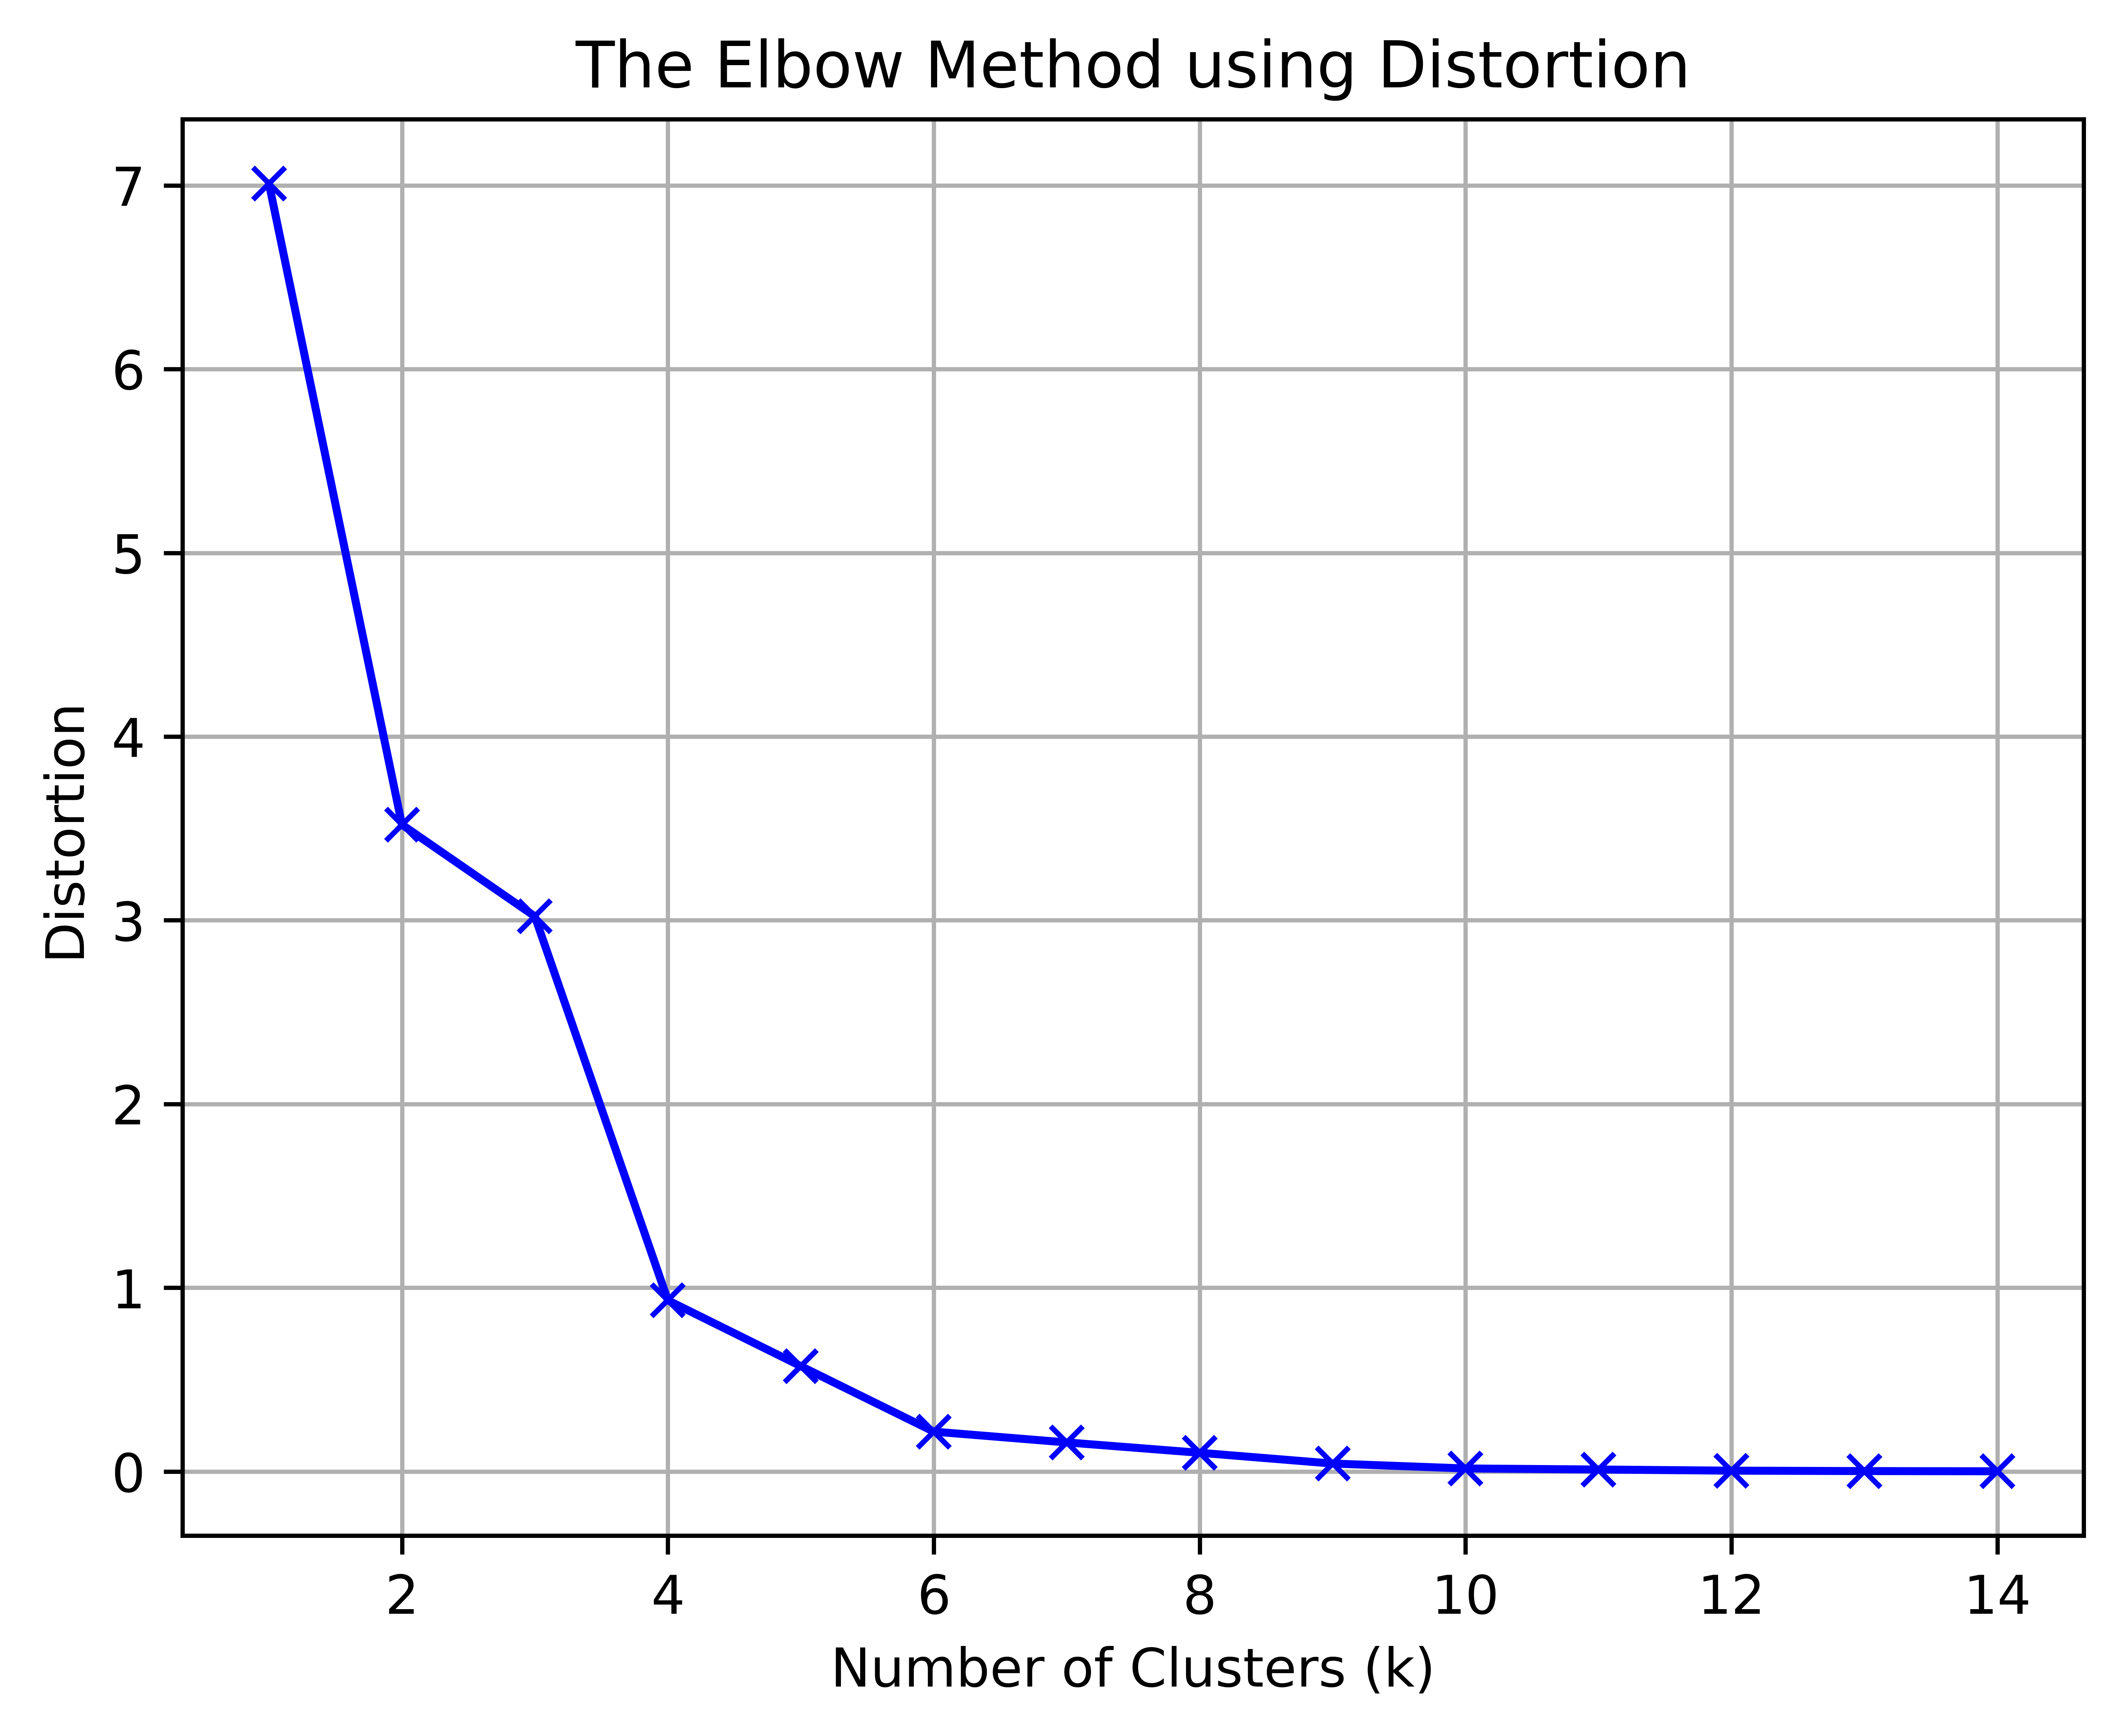

In [ ]:
# Initialize lists to store distortion and inertia values
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 15)

# Fit K-means for different values of k
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42).fit(data_no_country_normalized_reduced)

    # Calculate distortion as the average squared distance from points to their cluster centers
    distortions.append(sum(np.min(cdist(data_no_country_normalized_reduced, kmeanModel.cluster_centers_, 'euclidean'), axis=1)**2) / data_no_country_normalized_reduced.shape[0])

    # Inertia is calculated directly by KMeans
    inertias.append(kmeanModel.inertia_)

    # Store the mappings for easy access
    mapping1[k] = distortions[-1]
    mapping2[k] = inertias[-1]

# Distortion and inertia are two ways to measure distance. Supposedly they most often will produce the same optimal K.
# Plotting the graph of k versus Distortion
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.grid()
plt.show()


In [ ]:
# Optimal k is where the rate of change in the plot starts to decrease (wherever it flattens out-ish)

k = 5  # Replace with your chosen number of clusters

kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(data_no_country_normalized_reduced)

# Add the cluster labels to the original dataframe
df_normalized_reduced['Cluster'] = kmeans.labels_

# Display country and their cluster assignments
country_clusters = df_normalized_reduced[['Cluster']]
countries_by_cluster = df_normalized_reduced.groupby('Cluster').apply(lambda group: group.index.tolist())
# Print skills in each cluster without truncation
for cluster_id, country in countries_by_cluster.items():
    print(f"Cluster {cluster_id}:")
    for country_id in country:
      print(df_normalized_reduced.iloc[country_id]['Country'])
    #for country in countries_by_cluster['Country']:
    #    print(f"  {country}")
    print("\n")  # Add space between clusters for readability

Cluster 0:
Australia
Canada
Estonia
New Zealand
Norway


Cluster 1:
Singapore
South Korea
Switzerland


Cluster 2:
United States


Cluster 3:
India
Vietnam


Cluster 4:
China
Finland
Germany
Sweden
UK




<ipython-input-15-e5cc557e4d4f>:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  countries_by_cluster = df_normalized_reduced.groupby('Cluster').apply(lambda group: group.index.tolist())


##Hierarchical Clustering

In [ ]:
data = list(zip(df_normalized_reduced[0], df_normalized_reduced[1]))
Y = linkage(data, method='ward', metric = 'euclidean')
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_axes([0.1,0.1,0.4,0.6])


Z1 = dendrogram(Y, orientation='right')
labels = df_normalized_reduced['Country']
ax1.set_xticks([])
ax1.set_yticklabels(labels)

plt.plot() # supress prints


#Feature importance (random forest)

In [ ]:
forest = RandomForestRegressor(random_state=0)
forest.fit(df_orig.drop(columns=['Country','Innovation Score']), df_orig['Innovation Score'])
importances = forest.feature_importances_
#std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
forest_importances = pd.Series(importances, index=df_orig.drop(columns=['Country','Innovation Score']).columns.values)

fig, ax = plt.subplots()
#forest_importances.plot.bar(yerr=std, ax=ax)
forest_importances.plot.bar(ax=ax)
ax.set_title("Key Drivers of Innovation Importance")
ax.set_ylabel("Mean decrease in impurity")

labels = ["R&D Spending", "Researchers per Capita", "Education Quality",
          "Patents per Capita", "Unicorn Startups", "High-tech Exports",
          "Innovation Spending", "VC Investments",
          "Public-Private Collaboration", "Infrastructure Readiness", "Knowledge Diffusion",
          "Tax Incentives"]


ax.set_xticklabels(labels)
fig.tight_layout()

In [ ]:
# BUSINESS ORIENTED PLOT
# Define your RandomForest model and calculate feature importances
forest = RandomForestRegressor(random_state=0)
forest.fit(df_orig.drop(columns=['Country', 'Innovation Score']), df_orig['Innovation Score'])
importances = forest.feature_importances_
forest_importances = pd.Series(importances, index=df_orig.drop(columns=['Country', 'Innovation Score']).columns.values)

# Define labels for x-axis
labels = [
    "R&D Spending", "Researchers (per Capita)", "Education Quality", "Patents (per Capita)",
    "Unicorn Startups", "High-Tech Exports", "Gov't Innovation Spending",
    "VC Investments", "Public-Private Collaboration", "Infrastructure Readiness", "Knowledge Diffusion",
    "Tax Incentives"
]

# Match the feature importances with the correct labels
forest_importances.index = labels

# Sort values for proper order in horizontal bar chart
sorted_importances = forest_importances.sort_values(ascending=True)

# Define colors: bold blue for top 3, light blue for others, light red for the bottom 3
colors = [
    "#F4CCCC" if i in sorted_importances[:2].values or sorted_importances[6]].values else
    "#1f77b4" if i in sorted_importances[-3:].values else
    "#A9CCE3"
    for i in sorted_importances
]

# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust figure size for readability
sorted_importances.plot.barh(ax=ax, color=colors)

# Set titles and labels
ax.set_title("Key Factors Driving Innovation Success", fontsize=16, pad=20)
ax.set_xlabel("Contribution to Innovation Score", fontsize=12)
ax.set_ylabel("Factors", fontsize=12)
ax.set_yticklabels(sorted_importances.index, fontsize=10)

# Set x-axis limits to avoid cutting off annotations
ax.set_xlim(0, sorted_importances.max() + 0.02)

# Annotate bars with their importance scores
for i, v in enumerate(sorted_importances):
    ax.text(v + 0.005, i, f"{v:.2f}", va='center', fontsize=10, color="black")

fig.tight_layout()
fig.savefig("key_factors_innovation_success.png", dpi=300, bbox_inches='tight')
plt.show()

from google.colab import files
files.download("key_factors_innovation_success.png")